In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

In [31]:
data = pd.read_csv('../data/preprocessed.csv',parse_dates=True)
data['time'] = data['time'].apply(datetime.datetime.fromisoformat)

In [32]:
data['energy_lag'] = data['energy'].shift(1).fillna(0)

In [33]:
data['energy_difference'] = data['energy'] - data['energy_lag'] 

In [34]:
#removing first row since it is not possible to have non-comulative data for this row
data = data[1:]

In [35]:
def get_month(datetime_obj):
    return datetime_obj.month

Plotting the first 2 weeks of energy data as timeseries

In [45]:
data['time'].iloc[0] + datetime.timedelta(weeks=2)

Timestamp('2022-04-24 13:00:00')

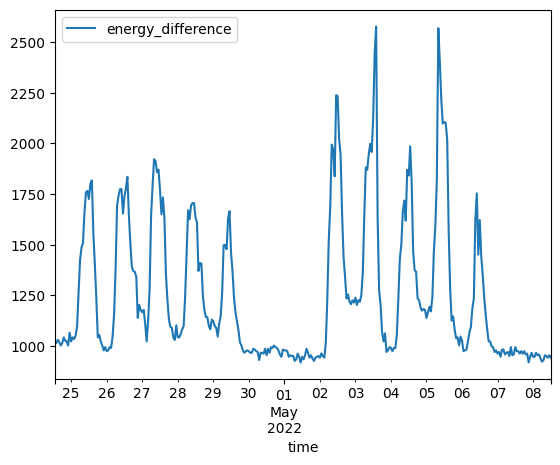

In [58]:
#First two weeks of data
two_weeks_df = data[data['time']< (data['time'].iloc[0] + datetime.timedelta(weeks=2)) ]
fig = two_weeks_df.plot(x='time',y=['energy_difference'])
plt.savefig('../plots/first_2_weeks_energy.png')

Plotting random 2 weeks of data

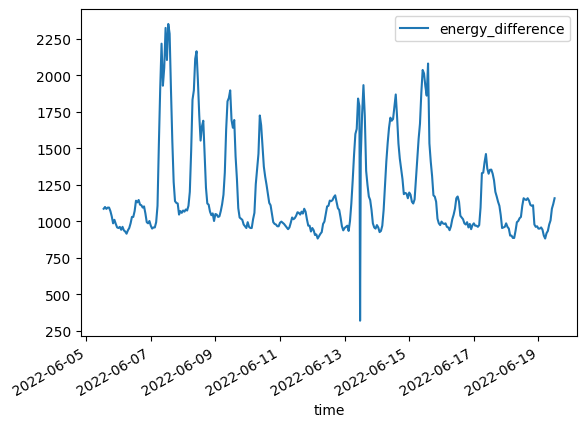

In [59]:
#plotting random 2 weeks of data
week_number = 6
two_weeks_df = data[(data['time'] >= (data['time'].iloc[0] + datetime.timedelta(weeks=week_number))) &  (data['time'] < (data['time'].iloc[0] + datetime.timedelta(weeks=week_number+2)))]
two_weeks_df.plot(x='time',y=['energy_difference'])
plt.savefig('../plots/random_2_weeks_energy.png')